## Importing the relevant packages

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA, ARMA
from scipy.stats.distributions import chi2 
from math import sqrt
import seaborn as sns
sns.set()

In [2]:
from influxdb_client import InfluxDBClient

In [3]:
import warnings
warnings.filterwarnings("ignore")

## Importing the Data and Pre-processing 

In [4]:
#Auth parameters
my_token = "yaKfFeAsha8tNAZxvYeZBMmq-khO8tz-6Ut_PARgohiWzeW2j8BB86ND33Qbq7hR8bylmOROPQAUr-7M103_Yw=="
my_org = "iot-org"
bucket = "iot-demo"
client = InfluxDBClient(url="http://192.168.1.100:9999", token=my_token, org=my_org, debug=False)

In [5]:
queryTemperature = '''
from(bucket: "iot-demo")
  |> range(start: -48h, stop: now())
  |> filter(fn: (r) => r["_measurement"] == "temperature")
  |> filter(fn: (r) => r["device"] == "RoomWeather")
  |> aggregateWindow(every: 10m, fn: median)
  '''

queryHumidity = '''
from(bucket: "iot-demo")
  |> range(start: -48h, stop: now())
  |> filter(fn: (r) => r["_measurement"] == "humidity")
  |> filter(fn: (r) => r["device"] == "RoomWeather")
  |> aggregateWindow(every: 10m, fn: median)
  '''

queryPressure = '''
from(bucket: "iot-demo")
  |> range(start: -48h, stop: now())
  |> filter(fn: (r) => r["_measurement"] == "pressure")
  |> filter(fn: (r) => r["device"] == "RoomWeather")
  |> aggregateWindow(every: 10m, fn: median)
  '''

In [6]:
#Query InfluxDB and return a Dataframe
dfTemp = client.query_api().query_data_frame(org=my_org, query=queryTemperature)
dfHum = client.query_api().query_data_frame(org=my_org, query=queryHumidity)
dfPress = client.query_api().query_data_frame(org=my_org, query=queryPressure)

In [7]:
dfTemp.head()

,result,table,_start,_stop,_field,_measurement,device,location,_value,_time
0,_result,0,2020-07-07 15:28:23.495338+00:00,2020-07-09 15:28:23.495338+00:00,value,temperature,RoomWeather,ubuntu,NaN,2020-07-07 15:30:00+00:00
1,_result,0,2020-07-07 15:28:23.495338+00:00,2020-07-09 15:28:23.495338+00:00,value,temperature,RoomWeather,ubuntu,30.50,2020-07-07 15:40:00+00:00
2,_result,0,2020-07-07 15:28:23.495338+00:00,2020-07-09 15:28:23.495338+00:00,value,temperature,RoomWeather,ubuntu,30.45,2020-07-07 15:50:00+00:00
3,_result,0,2020-07-07 15:28:23.495338+00:00,2020-07-09 15:28:23.495338+00:00,value,temperature,RoomWeather,ubuntu,NaN,2020-07-07 16:00:00+00:00
4,_result,0,2020-07-07 15:28:23.495338+00:00,2020-07-09 15:28:23.495338+00:00,value,temperature,RoomWeather,ubuntu,30.60,2020-07-07 16:10:00+00:00


In [8]:
dfHum.head()

,result,table,_start,_stop,_field,_measurement,device,location,_value,_time
0,_result,0,2020-07-07 15:28:24.735010+00:00,2020-07-09 15:28:24.735010+00:00,value,humidity,RoomWeather,ubuntu,41.20,2020-07-07 15:30:00+00:00
1,_result,0,2020-07-07 15:28:24.735010+00:00,2020-07-09 15:28:24.735010+00:00,value,humidity,RoomWeather,ubuntu,40.85,2020-07-07 15:40:00+00:00
2,_result,0,2020-07-07 15:28:24.735010+00:00,2020-07-09 15:28:24.735010+00:00,value,humidity,RoomWeather,ubuntu,40.10,2020-07-07 15:50:00+00:00
3,_result,0,2020-07-07 15:28:24.735010+00:00,2020-07-09 15:28:24.735010+00:00,value,humidity,RoomWeather,ubuntu,39.40,2020-07-07 16:00:00+00:00
4,_result,0,2020-07-07 15:28:24.735010+00:00,2020-07-09 15:28:24.735010+00:00,value,humidity,RoomWeather,ubuntu,38.90,2020-07-07 16:10:00+00:00


In [9]:
dfPress.head()

,result,table,_start,_stop,_field,_measurement,device,location,_value,_time
0,_result,0,2020-07-07 15:28:25.963809+00:00,2020-07-09 15:28:25.963809+00:00,value,pressure,RoomWeather,ubuntu,NaN,2020-07-07 15:30:00+00:00
1,_result,0,2020-07-07 15:28:25.963809+00:00,2020-07-09 15:28:25.963809+00:00,value,pressure,RoomWeather,ubuntu,NaN,2020-07-07 15:40:00+00:00
2,_result,0,2020-07-07 15:28:25.963809+00:00,2020-07-09 15:28:25.963809+00:00,value,pressure,RoomWeather,ubuntu,NaN,2020-07-07 15:50:00+00:00
3,_result,0,2020-07-07 15:28:25.963809+00:00,2020-07-09 15:28:25.963809+00:00,value,pressure,RoomWeather,ubuntu,NaN,2020-07-07 16:00:00+00:00
4,_result,0,2020-07-07 15:28:25.963809+00:00,2020-07-09 15:28:25.963809+00:00,value,pressure,RoomWeather,ubuntu,NaN,2020-07-07 16:10:00+00:00


In [ ]:
df = pd.DataFrame(dfTemp['_time']).rename(columns={'_time':'time'})
df['temperature'] = dfTemp['_value']
df['humidity'] = dfHum['_value']
df['pressure'] = dfPress['_value']
df = df.set_index('time')
df.head()

# Fill NaN values

In [ ]:
df['temperature'] = df['temperature'].fillna(method='backfill')
df['humidity'] = df['humidity'].fillna(method='backfill')
df['pressure'] = df['pressure'].fillna(method='backfill')

In [34]:
df_dim = len(df)

# Split the dataset

In [ ]:
# divide in train e test
size = int(len(df)*0.8)
df_train, df_test = df.iloc[:size], df.iloc[size:]

# Dickey–Fuller test

In [22]:
sts.adfuller(df.temperature) # stazionaria

(-3.0111832577687916,
 0.033863141198506676,
 13,
 275,
 {'1%': -3.454355055831705,
  '5%': -2.8721080938842976,
  '10%': -2.572401325619835},
 -373.65490583735027)

In [23]:
sts.adfuller(df.humidity) # stazionaria

(-3.4671655349759107,
 0.008871497419914144,
 13,
 275,
 {'1%': -3.454355055831705,
  '5%': -2.8721080938842976,
  '10%': -2.572401325619835},
 -55.37390730491069)

In [25]:
sts.adfuller(df.pressure)

(-1.1483200884396472,
 0.6954230553310111,
 2,
 286,
 {'1%': -3.4534232986669546,
  '5%': -2.8716994185534745,
  '10%': -2.5721833625116144},
 -142.13167061605742)

## The LLR Test

In [55]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

## Auto Correlation Function (ACF)

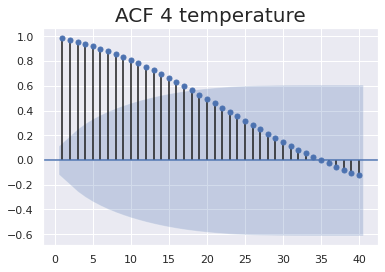

In [73]:
sgt.plot_acf(df.temperature, zero = False, lags = 40)
plt.title("ACF 4 temperature", size = 20)
plt.show()

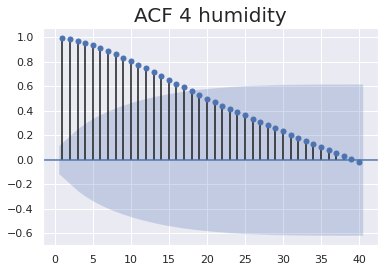

In [72]:
sgt.plot_acf(df.humidity, zero = False, lags = 40)
plt.title("ACF 4 humidity", size = 20)
plt.show()

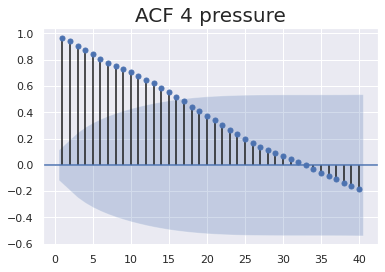

In [71]:
sgt.plot_acf(df.pressure, zero = False, lags = 40)
plt.title("ACF 4 pressure", size = 20)
plt.show()

## Partial Auto Correlation Function (PACF)

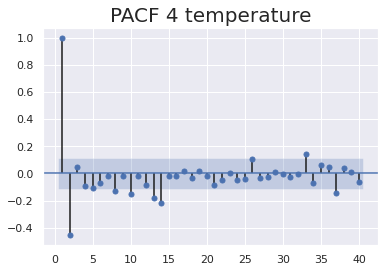

In [50]:
sgt.plot_pacf(df.temperature, lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF 4 temperature", size = 20)
plt.show()

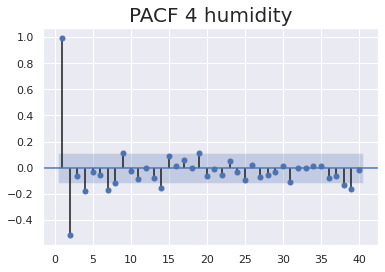

In [65]:
sgt.plot_pacf(df.humidity, lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF 4 humidity", size = 20)
plt.show()

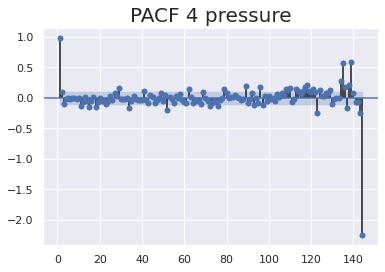

In [48]:
sgt.plot_pacf(df.pressure, lags = df_dim/2, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF 4 pressure", size = 20)
plt.show()

# Temperature

## AR(1)

In [66]:
model_t_ar_1 = ARIMA(df.temperature, order=(1,0,0))
results_t_ar_1 = model_t_ar_1.fit()
results_t_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            temperature   No. Observations:                  289
Model:                     ARMA(1, 0)   Log Likelihood                 163.576
Method:                       css-mle   S.D. of innovations              0.136
Date:                Thu, 09 Jul 2020   AIC                           -321.152
Time:                        18:58:39   BIC                           -310.153
Sample:                             0   HQIC                          -316.745
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                30.4183      1.279     23.785      0.000      27.912      32.925
ar.L1.temperature     0.9960      0.004    277.957      0.000       0.989       1.003
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0040           +0.0000j            1.0040            0.0000
-----------------------------------------------------------------------------
"""

## AR(2)

In [67]:
model_t_ar_2 = ARIMA(df.temperature, order=(2,0,0))
results_t_ar_2 = model_t_ar_2.fit()
results_t_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            temperature   No. Observations:                  289
Model:                     ARMA(2, 0)   Log Likelihood                 196.905
Method:                       css-mle   S.D. of innovations              0.121
Date:                Thu, 09 Jul 2020   AIC                           -385.810
Time:                        18:58:57   BIC                           -371.144
Sample:                             0   HQIC                          -379.933
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                29.9877      1.060     28.289      0.000      27.910      32.065
ar.L1.temperature     1.4482      0.052     27.753      0.000       1.346       1.550
ar.L2.temperature    -0.4537      0.052     -8.669      0.000      -0.556      -0.351
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0103           +0.0000j            1.0103            0.0000
AR.2            2.1818           +0.0000j            2.1818            0.0000
-----------------------------------------------------------------------------
"""

## AR(3)

In [68]:
model_t_ar_3 = ARIMA(df.temperature, order=(3,0,0))
results_t_ar_3 = model_t_ar_3.fit()
results_t_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            temperature   No. Observations:                  289
Model:                     ARMA(3, 0)   Log Likelihood                 197.184
Method:                       css-mle   S.D. of innovations              0.121
Date:                Thu, 09 Jul 2020   AIC                           -384.369
Time:                        18:59:14   BIC                           -366.037
Sample:                             0   HQIC                          -377.023
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                30.0279      1.091     27.525      0.000      27.890      32.166
ar.L1.temperature     1.4682      0.059     25.051      0.000       1.353       1.583
ar.L2.temperature    -0.5174      0.100     -5.179      0.000      -0.713      -0.322
ar.L3.temperature     0.0439      0.059      0.748      0.454      -0.071       0.159
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0094           +0.0000j            1.0094            0.0000
AR.2            2.8467           +0.0000j            2.8467            0.0000
AR.3            7.9245           +0.0000j            7.9245            0.0000
-----------------------------------------------------------------------------
"""

In [69]:
print("\nLLR test AR(1)-AR(2) = " + str(LLR_test(results_t_ar_1, results_t_ar_2)))
print("\nLLR test AR(2)-AR(3) = " + str(LLR_test(results_t_ar_2, results_t_ar_3)))


LLR test AR(1)-AR(2) = 0.0

LLR test AR(2)-AR(3) = 0.455


In [82]:
from pmdarima.arima import auto_arima
model_t_auto = auto_arima(df.temperature[1:], exogenous = df[['humidity', 'pressure']][1:], 
                        m=145, max_order = None, max_p = 7, max_q = 7, max_d = 2, max_P = 4, 
                        max_Q = 4, max_D = 2, maxiter = 50, alpha = 0.05, n_jobs = -1, trend = 'ct')





In [83]:
model_t_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  288
Model:             SARIMAX(1, 1, 0)x(1, 0, 0, 145)   Log Likelihood                 222.624
Date:                             Thu, 09 Jul 2020   AIC                           -431.249
Time:                                     20:26:39   BIC                           -405.632
Sample:                                          0   HQIC                          -420.982
                                             - 288                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0196      0.011     -1.707      0.088      -0.042       0.003
drift          0.0002   6.97e-05      2.280      0.023    2.23e-05       0.000
humidity      -0.2369      0.026     -9.167      0.000      -0.288      -0.186
pressure       0.0036      0.022      0.161      0.872      -0.040       0.047
ar.L1          0.3342      0.052      6.392      0.000       0.232       0.437
ar.S.L145      0.1771      0.098      1.804      0.071      -0.015       0.370
sigma2         0.0125      0.001     14.348      0.000       0.011       0.014
===================================================================================
Ljung-Box (Q):                       34.98   Jarque-Bera (JB):                44.70
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               1.29   Skew:                             0.51
Prob(H) (two-sided):                  0.21   Kurtosis:                         4.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## AR(1)

## MA(1)

In [79]:
model_t_ma_1 = ARIMA(df.temperature, order=(0,0,1))
results_t_ma_1 = model_t_ma_1.fit()
model_t_ma_2 = ARMA(df.temperature, order=(0,2))
results_t_ma_2 = model_t_ma_2.fit()
model_t_ma_3 = ARMA(df.temperature, order=(0,3))
results_t_ma_3 = model_t_ma_3.fit()

ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

# Humidity

## MA(1)

In [70]:
model_h_ma_1 = ARIMA(df.humidity, order=(0,0,1))
results_h_ma_1 = model_h_ma_1.fit()
results_h_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               humidity   No. Observations:                  289
Model:                     ARMA(0, 1)   Log Likelihood                -492.392
Method:                       css-mle   S.D. of innovations              1.322
Date:                Thu, 09 Jul 2020   AIC                            990.784
Time:                        19:21:17   BIC                           1001.783
Sample:                             0   HQIC                           995.191
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             41.1118      0.154    267.787      0.000      40.811      41.413
ma.L1.humidity     0.9769      0.009    105.156      0.000       0.959       0.995
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0237           +0.0000j            1.0237            0.5000
-----------------------------------------------------------------------------
"""

## ARIMA(1,1,1)

In [ ]:
model_ar_1_i_1_ma_1 = ARIMA(df.temperature, order=(1,1,1))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
results_ar_1_i_1_ma_1.summary()

## Residuals of the ARIMA(1,1,1)

In [ ]:
df['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid.iloc[:]
sgt.plot_acf(df.res_ar_1_i_1_ma_1[1:], zero = False, lags = 40) # prendo gli elementi che partono da quello con indice 1
plt.title("ACF Of Residuals for ARIMA(1,1,1)",size=20)
plt.show()

## Higher-Lag ARIMA Models

In [ ]:
model_ar_1_i_1_ma_2 = ARIMA(df.market_value, order=(1,1,2))
results_ar_1_i_1_ma_2 = model_ar_1_i_1_ma_2.fit()
model_ar_1_i_1_ma_3 = ARIMA(df.market_value, order=(1,1,3))
results_ar_1_i_1_ma_3 = model_ar_1_i_1_ma_3.fit()
model_ar_2_i_1_ma_1 = ARIMA(df.market_value, order=(2,1,1))
results_ar_2_i_1_ma_1 = model_ar_2_i_1_ma_1.fit()
model_ar_3_i_1_ma_1 = ARIMA(df.market_value, order=(3,1,1))
results_ar_3_i_1_ma_1 = model_ar_3_i_1_ma_1.fit()
model_ar_3_i_1_ma_2 = ARIMA(df.market_value, order=(3,1,2))
results_ar_3_i_1_ma_2 = model_ar_3_i_1_ma_2.fit(start_ar_lags=5)

In [ ]:
print("ARIMA(1,1,1):  \t LL = ", results_ar_1_i_1_ma_1.llf, "\t AIC = ", results_ar_1_i_1_ma_1.aic)
print("ARIMA(1,1,2):  \t LL = ", results_ar_1_i_1_ma_2.llf, "\t AIC = ", results_ar_1_i_1_ma_2.aic)
print("ARIMA(1,1,3):  \t LL = ", results_ar_1_i_1_ma_3.llf, "\t AIC = ", results_ar_1_i_1_ma_3.aic)
print("ARIMA(2,1,1):  \t LL = ", results_ar_2_i_1_ma_1.llf, "\t AIC = ", results_ar_2_i_1_ma_1.aic)
print("ARIMA(3,1,1):  \t LL = ", results_ar_3_i_1_ma_1.llf, "\t AIC = ", results_ar_3_i_1_ma_1.aic)
print("ARIMA(3,1,2):  \t LL = ", results_ar_3_i_1_ma_2.llf, "\t AIC = ", results_ar_3_i_1_ma_2.aic)

In [ ]:
print("\nLLR test p-value = " + str(LLR_test(results_ar_1_i_1_ma_2, results_ar_1_i_1_ma_3)))

In [ ]:
print("\nLLR test p-value = " + str(LLR_test(results_ar_1_i_1_ma_1, results_ar_1_i_1_ma_3, DF = 2)))

In [ ]:
df['res_ar_1_i_1_ma_3'] = results_ar_1_i_1_ma_3.resid
sgt.plot_acf(df.res_ar_1_i_1_ma_3[1:], zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(1,1,3)", size=20)
plt.show()

In [ ]:
model_ar_5_i_1_ma_1 = ARIMA(df.market_value, order=(5,1,1))
results_ar_5_i_1_ma_1 = model_ar_5_i_1_ma_1.fit(start_ar_lags=11)
model_ar_6_i_1_ma_3 = ARIMA(df.market_value, order=(6,1,3))
results_ar_6_i_1_ma_3 = model_ar_6_i_1_ma_3.fit(start_ar_lags=11)

In [ ]:
results_ar_5_i_1_ma_1.summary()

In [ ]:
print("ARIMA(1,1,3):  \t LL = ", results_ar_1_i_1_ma_3.llf, "\t AIC = ", results_ar_1_i_1_ma_3.aic)
print("ARIMA(5,1,1):  \t LL = ", results_ar_5_i_1_ma_1.llf, "\t AIC = ", results_ar_5_i_1_ma_1.aic)
print("ARIMA(6,1,3):  \t LL = ", results_ar_6_i_1_ma_3.llf, "\t AIC = ", results_ar_6_i_1_ma_3.aic)

In [ ]:
print("\nLLR test p-value = " + str(LLR_test(results_ar_1_i_1_ma_3, results_ar_6_i_1_ma_3, DF = 5)))

In [ ]:
print("\nLLR test p-value = " + str(LLR_test(results_ar_5_i_1_ma_1, results_ar_6_i_1_ma_3, DF = 3)))

In [ ]:
df['res_ar_5_i_1_ma_1'] = results_ar_5_i_1_ma_1.resid
sgt.plot_acf(df.res_ar_5_i_1_ma_1[1:], zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(5,1,1)", size=20)
plt.show()

## Models with Higher Levels of Integration

In [ ]:
df['delta_prices']=df.market_value.diff(1)

In [ ]:
model_delta_ar_1_i_1_ma_1 = ARIMA(df.delta_prices[1:], order=(1,0,1))
results_delta_ar_1_i_1_ma_1 = model_delta_ar_1_i_1_ma_1.fit()
results_delta_ar_1_i_1_ma_1.summary()

In [ ]:
sts.adfuller(df.delta_prices[1:])

In [ ]:
model_ar_1_i_2_ma_1 = ARIMA(df.market_value, order=(1,2,1))
results_ar_1_i_2_ma_1 = model_ar_1_i_2_ma_1.fit(start_ar_lags=10)
results_ar_1_i_2_ma_1.summary()

In [ ]:
df['res_ar_1_i_2_ma_1'] = results_ar_1_i_2_ma_1.resid.iloc[:]
sgt.plot_acf(df.res_ar_1_i_2_ma_1[2:], zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(1,2,1)",size=20)
plt.show()

## ARIMAX 

In [ ]:
model_ar_1_i_1_ma_1_Xspx = ARIMA(df.market_value, exog = df.spx, order=(1,1,1))
results_ar_1_i_1_ma_1_Xspx = model_ar_1_i_1_ma_1_Xspx.fit()
results_ar_1_i_1_ma_1_Xspx.summary()

## SARIMAX

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model_sarimax = SARIMAX(df.market_value, exog = df.spx, order=(1,0,1), seasonal_order = (2,0,1,5))
results_sarimax = model_sarimax.fit()
results_sarimax.summary()